# SciPy statistics

SciPy package has lots of functions and algorithsms for engineering and science study. One of the module is statistics (scipy.stats), which has lots of tools related to statistics study. It has lots of predefined distribution functions ready to use.  

In SciPy stats, Most of the function can be used in similar ways like this:  

    st.<distribution_name>.<function_name>(arguments)

the meaning of each part:

- `st`, the alias name for statistics module
- `distribution_name`, the random variable distribution name. for normal distribution it is `norm`
- `function_name`, the function of the distribution
- `arguments`, values / parameters which needed for the function we want to use.

Here is a list of functions that is common for all distributions.  

- rvs():   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Random variates, that is, pseudorandom number generation  
- cdf():   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Cumulative distribution function  
- pdf():   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Probability density function (for continuous variables)  
- pmf():   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Probability mass function (for discrete variables)  
- ppf():   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Percent point function, the inverse of the cumulative distribution function  
- stats(): &nbsp;&nbsp;&nbsp;&nbsp;Compute statistics (moments) for distribution. (mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis)  
- mean():  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Compute mean value  
- std():   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Compute standard deviation  
- var():   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Compute variance  
- fit():   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fit data to the distribution and return the parameters (for continuous variables)  

## Basic Statistics Knowledge

One basic concept must made clear is **statitical distribution**. It means a random variable, which values appear according to certain rules.  
Simple distribution like:  
- uniform distribution, which the random variable's value appear in certain range equal likely. 
- Bernoulli distribution, which the random variable's value appear as success (value 1) with possibility $p$, failure (value 0) with possibility $1-p$.   
- Binomial distritubion, which is repeat Bernoulli test for N times.

There are many other statitical distributions, let's have a look of some of them.

Some formula and basic statistics knowledge: a set of data $x_1, x_2, ... , x_N$, nomally it is called a random variable $x$, and those data can thought of as samples from this random variable.  
To study the sample, here are some basic concepts: the mean value of those data $\bar{X}$, variance $\sigma^2$ and standard deviation $\sigma$  
  
$$ \bar{X} = \frac {\Sigma_{i=1}^{N} x_i} {N} $$
  
  
$$ \sigma^2 = \frac {\Sigma_{i=1}^{N} (x_i-\bar{X})^2} {N} $$

Median is the value if we sort all, then the middle position value.  
Mode is the value which with most high probability.

The random variable $x$ has a PDF (or PMF, for discrete variable), is to show how is the possibility of this variable taking different valuel.   

Normal distribution is the most often used random variable distribution and it can be used to model many actual problems. It is a continuous variable, and PDF is:  
  
$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $$
  
![Normal Distribution](800px-Normal_Distribution_PDF.jpg)  
  
Mode = median = mean = $\mu$. standard deviation is $\sigma$.

Binomial distribution: for repeat Bernoulli test N times, get k times value 1 (success).  
  
$$ P(k: N,p) = \lgroup  \begin{array} {c} N \\ k \end{array}  \rgroup p^k(1-p)^{N-k} = \frac{N!}{k!(N-k)!} p^k(1-p)^{N-k} $$
  
![Binormial](800px-Binomial_distribution_pmf.jpg)   
  
Mean = $Np$, variance = $Np(1-p)$

There is also skewness, and kurtosis.  
  
![skewness and kurtosis](skewness-kurtosis.jpg)      
  
There are many different formula used to calculate the skewness and kurtosis, yields in different value. Only for skewness, the positiveness and negativeness must be kept, symetric distribution must be zero. For Kurtosis, zero means mesokurtic, negative means platykurtic (heavy tail), positive means leptokurtic (light tail). Here is one way of calculation:  
  
$$ Skewness = \frac {N}{(N-1)(N-2)} \frac {\Sigma_{i=1}^{N}(x_i - \bar{X})^3}{\sigma^3} $$
  
  
$$ Kurtosis = \frac {N(N+1)}{(N-1)(N-2)(N-3)} \frac {\Sigma_{i=1}^{N}(x_i - \bar{X})^4}{\sigma^4} - \frac {3(N-1)^2}{(N-2)(N-3)} $$
  

A normal distribution have 0 skewness and 0 kurtosis. For 0 skewness distribution, mode = median = mean.

## Using SciPy stats module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as st

plt.style.use('seaborn')
plt.rcParams.update({'figure.figsize': (12,6),\
                     'figure.titlesize':16,\
                     'axes.titlesize':16,\
                     'axes.labelsize':14,\
                     'xtick.labelsize':14,\
                     'ytick.labelsize':14,
                    })

After imported the module, can use the alias `st` to use the functions in this module.  

## Normal distribution of actual case: human body height

There is a study article about Malaysian height, published in year 2009, by author Baba Md Deros etc., at European Journal of Scientific Research, which said mean height of Malaysian is 1623.55mm, standard deviation is 90.99. 5th percentile is height 1473.72mm, 95th percentile is 1773.68.  
The paper also has data for man and woman separately.  
For men, mean height is 1699.51mm, SD is 61.39, 5th percentile is 1598.22, 95th percentile is 1800.80.  
For women, mean height is 1566.74, SD is 64.09, 5th percentile is 1460.99, 95th percentile is 1672.49.  
Use those statistical data we can create the distribution of the Malaysian Height.

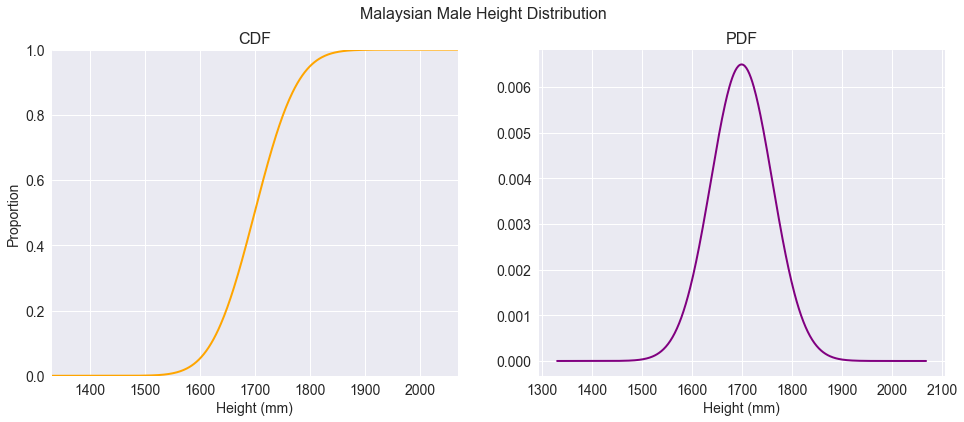

In [2]:
mean_m = 1699.51
sdev_m = 61.39
rv_norm_m = st.norm(loc=mean_m, scale = sdev_m)

xmin = mean_m - 6 * sdev_m
xmax = mean_m + 6 * sdev_m
x_m_seri = np.linspace(xmin, xmax, 500)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
fig.suptitle('Malaysian Male Height Distribution')
ax1.set(title='CDF',xlabel='Height (mm)', ylabel='Proportion',xlim=(xmin,xmax),ylim=(0.0,1.0))
ax1.plot(x_m_seri, rv_norm_m.cdf(x_m_seri),linewidth=2,color='orange')
ax2.set(title='PDF',xlabel='Height (mm)')
ax2.plot(x_m_seri, rv_norm_m.pdf(x_m_seri),linewidth=2,color='purple')
plt.show()

In [3]:
rv_norm_m.cdf(1598.22)*100

4.94772986912722

In [4]:
rv_norm_m.cdf(1800.80)*100

95.05227013087278

In [5]:
rv_norm_m.ppf(0.25)

1658.1030742354626

In [6]:
rv_norm_m.ppf(0.75)

1740.9169257645374

So half the male population height is in the range between 1658.1mm to 1740.9mm.

## Normal distribution: house fly length

We try with a dataset and then build a distribution model for the dataset.  
The data is a measurement of the length of house flies. We import the data using numpy.

In [7]:
import pathlib

file_path = pathlib.Path('D:/Edu/data_resource/Housefly wing length s057.txt')
wing_length = np.fromfile(file_path, sep='\n', dtype=np.int32)
wing_length

array([36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42,
       42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50,
       50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55])

In [8]:
wing_length.size

100

Let's fit the data with a normal distribution.

In [9]:
mean, std = st.norm.fit(wing_length)
mean, std

(45.5, 3.9)

In [10]:
rv_wing_dist = st.norm(loc=mean,scale=std)

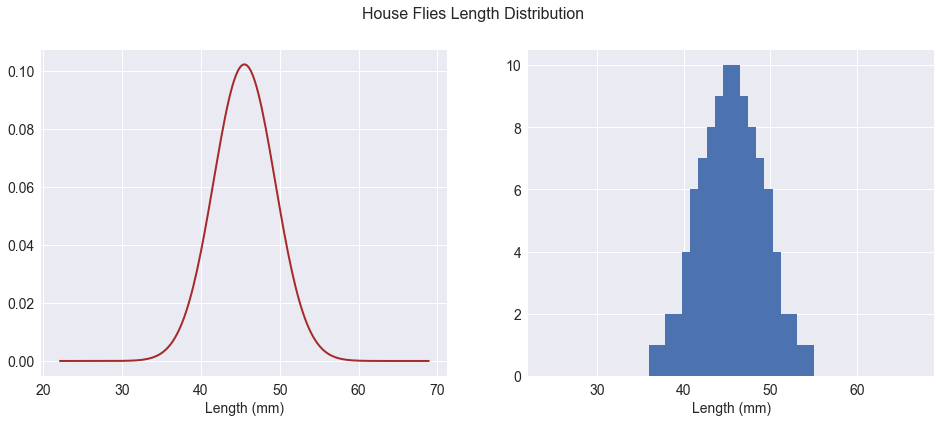

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('House Flies Length Distribution')
xmin = mean - 6 * std
xmax = mean + 6 * std
x_seri = np.linspace(xmin, xmax, 200)
ax1.set(xlabel='Length (mm)')
ax1.plot(x_seri, rv_wing_dist.pdf(x_seri),linewidth=2,color='brown')

ax2.hist(wing_length, bins=20)
ax2.set(xlabel='Length (mm)', xlim=(xmin, xmax))

plt.show()

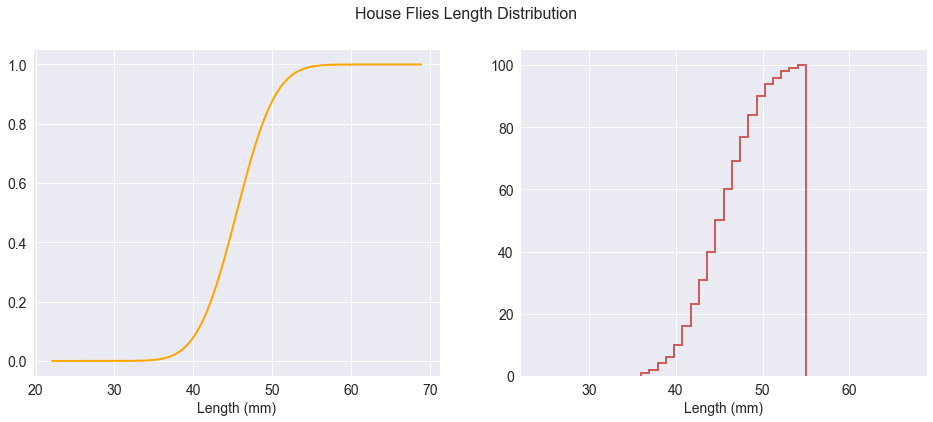

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('House Flies Length Distribution')
ax1.set(xlabel='Length (mm)')
ax1.plot(x_seri, rv_wing_dist.cdf(x_seri),linewidth=2,color='orange')
ax2.set(xlabel='Length (mm)', xlim=(xmin,xmax))
ax2.hist(wing_length, bins=20, cumulative=True, histtype='step', linewidth=2, color='indianred')
plt.show()

Using SciPy plot the distribution

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

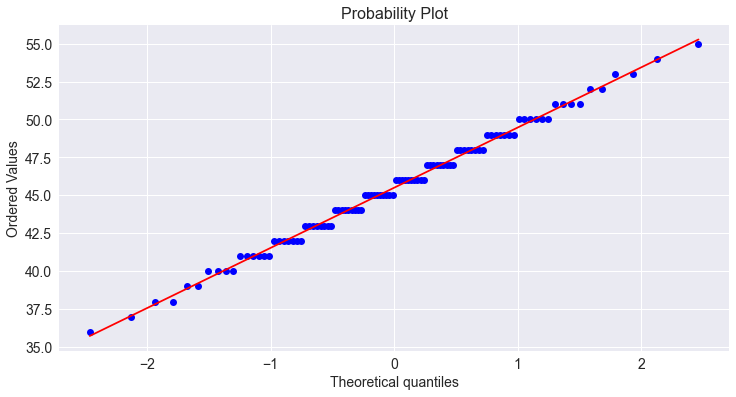

In [13]:
st.probplot(wing_length, dist='norm', plot=plt)

The probability plot shows an exact match to the normal distribution. Such a good match normally would tell us the original dataset high possibly is manipulated, possibly not come from a real measurement data.

## Binomial distribution and De Moivre–Laplace theorem

The De Moivre - Laplace Therom is about the noamal distribution and binomial distributino. It says that for the binomial distribution, when N is large enough, it will becomes like a normal distribution, with center $\mu=Np$, and standard deviation $\sigma=\sqrt {Np(1-p)}$.

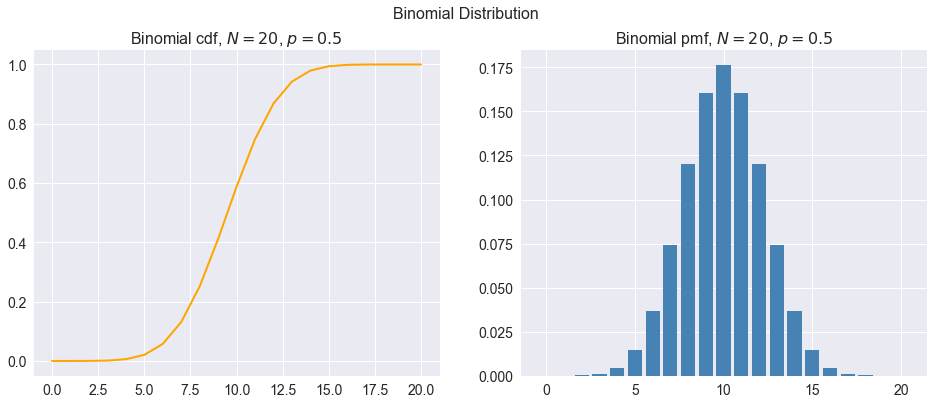

In [14]:
N = 20
p = 0.5

rv_binom = st.binom(N,p)

x_seri = np.arange(N+1)
cdf = rv_binom.cdf(x_seri)
pmf = rv_binom.pmf(x_seri)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Binomial Distribution')
ax1.set_title('Binomial cdf, $N=20$, $p=0.5$')
ax1.plot(x_seri, cdf, linewidth=2,color='orange')
ax2.set_title('Binomial pmf, $N=20$, $p=0.5$')
ax2.bar(x_seri, pmf, color='steelblue')
plt.show()

In [15]:
mean = N*p
std  = np.sqrt(N*p*(1-p))
mean, std

(10.0, 2.23606797749979)

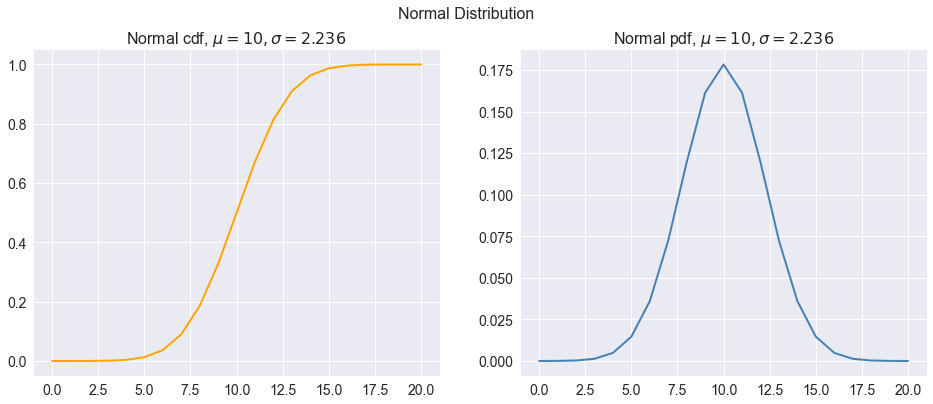

In [16]:
rv_norm = st.norm(loc=mean,scale=std)

cdf = rv_norm.cdf(x_seri)
pdf = rv_norm.pdf(x_seri)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Normal Distribution')
ax1.set_title('Normal cdf, $\mu=10, \sigma=2.236$')
ax1.plot(x_seri, cdf, linewidth=2,color='orange')
ax2.set_title('Normal pdf, $\mu=10, \sigma=2.236$')
ax2.plot(x_seri, pdf, linewidth=2, color='steelblue')
plt.show()

## Poisson distribution

The Poisson distributino is a random variate which accordint to the following:

- It is an integer, representing how many times an event occur during a period
- The occurance of one event will not affect the following. All events happen independantly.
- The rate at which event occurs is constant. There is no change in rate means cannot be higher in later interval or earlier interval.
- No event happen at exactly same time.

The PMF:
$$ P(k) = e^{-\lambda} \frac{\lambda^k}{k!} $$

where $\lambda$ is the rate. or mean value. In SciPy documents using mu for this (or $\mu$)

In [17]:
import scipy
x = np.arange(0,16)
rate = 3
y = np.exp(-rate)*(rate**x)/scipy.special.factorial(x)
y

array([4.97870684e-02, 1.49361205e-01, 2.24041808e-01, 2.24041808e-01,
       1.68031356e-01, 1.00818813e-01, 5.04094067e-02, 2.16040315e-02,
       8.10151179e-03, 2.70050393e-03, 8.10151179e-04, 2.20950322e-04,
       5.52375804e-05, 1.27471339e-05, 2.73152870e-06, 5.46305740e-07])

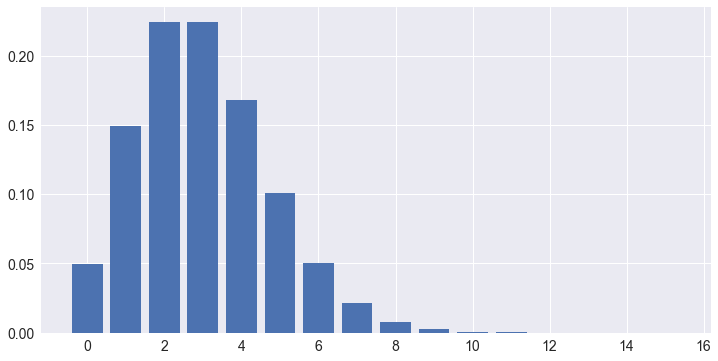

In [18]:
plt.bar(x,y)
plt.show()

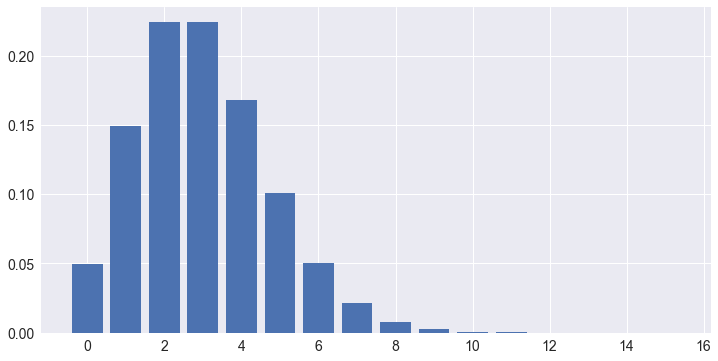

In [19]:
plt.bar(x,st.poisson.pmf(x,3))  # it should be exactly same as last one.
plt.show()

We use the football match results data to try find if can match with Poisson distribution.

In [20]:
import datetime
file_path = pathlib.Path('D:/Edu/data_resource/Kaggle International socker results.zip')

football_result = pd.read_csv(file_path, parse_dates=['date'])
football_result

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42423,2021-07-06,Trinidad and Tobago,French Guiana,1,1,Gold Cup qualification,Fort Lauderdale,United States,True
42424,2021-07-07,England,Denmark,2,1,UEFA Euro,London,England,False
42425,2021-07-09,Peru,Colombia,2,3,Copa América,Brasília,Brazil,True
42426,2021-07-10,Brazil,Argentina,0,1,Copa América,Rio de Janeiro,Brazil,False


In [21]:
football_result.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [22]:
football_result['total_goal']=football_result['home_score']+football_result['away_score']
football_result

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goal
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3
...,...,...,...,...,...,...,...,...,...,...
42423,2021-07-06,Trinidad and Tobago,French Guiana,1,1,Gold Cup qualification,Fort Lauderdale,United States,True,2
42424,2021-07-07,England,Denmark,2,1,UEFA Euro,London,England,False,3
42425,2021-07-09,Peru,Colombia,2,3,Copa América,Brasília,Brazil,True,5
42426,2021-07-10,Brazil,Argentina,0,1,Copa América,Rio de Janeiro,Brazil,False,1


In [23]:
football_result['total_goal'].max(), football_result['total_goal'].min(),

(31, 0)

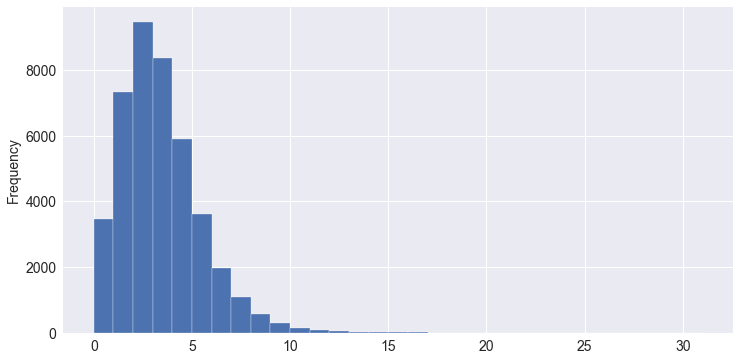

In [24]:
football_result['total_goal'].plot(kind='hist',bins=31,ec='white')
plt.show()

After trying with different `bins` parameter, using 20 can see possibilities of matching to Poisson distribution.

In [25]:
#st.poisson.fit(football_result['total_goal'])

There is no ready to use fit function for Poisson distribution. (For discrete distribution there is no fit() function)

In [26]:
mu = football_result['total_goal'].mean()
mu

2.9298340718393514

In [27]:
f1 = football_result['total_goal'].groupby(football_result['total_goal']).agg('count')
f1

total_goal
0     3474
1     7327
2     9447
3     8370
4     5880
5     3610
6     1975
7     1085
8      560
9      303
10     155
11      83
12      57
13      30
14      16
15      13
16      11
17       9
18       8
19       5
20       4
21       1
22       2
24       1
30       1
31       1
Name: total_goal, dtype: int64

In [28]:
f1 = f1 / f1.sum()
f1

total_goal
0     0.081880
1     0.172693
2     0.222660
3     0.197275
4     0.138588
5     0.085085
6     0.046549
7     0.025573
8     0.013199
9     0.007142
10    0.003653
11    0.001956
12    0.001343
13    0.000707
14    0.000377
15    0.000306
16    0.000259
17    0.000212
18    0.000189
19    0.000118
20    0.000094
21    0.000024
22    0.000047
24    0.000024
30    0.000024
31    0.000024
Name: total_goal, dtype: float64

In [29]:
x = np.arange(0,31)
f2 = st.poisson.pmf(x,mu)
f2

array([5.34058990e-02, 1.56470422e-01, 2.29216187e-01, 2.23855132e-01,
       1.63964598e-01, 9.60778132e-02, 4.69153418e-02, 1.96363096e-02,
       7.19139110e-03, 2.34106474e-03, 6.85893124e-04, 1.82686640e-04,
       4.46034620e-05, 1.00523648e-05, 2.10369721e-06, 4.10898917e-07,
       7.52416030e-08, 1.29673772e-08, 2.11068131e-09, 3.25470842e-10,
       4.76787782e-11, 6.65194803e-12, 8.85868363e-13, 1.12845535e-13,
       1.37757789e-14, 1.61442986e-15, 1.81923523e-16, 1.97409532e-17,
       2.06563276e-18, 2.08688319e-19, 2.03807383e-20])

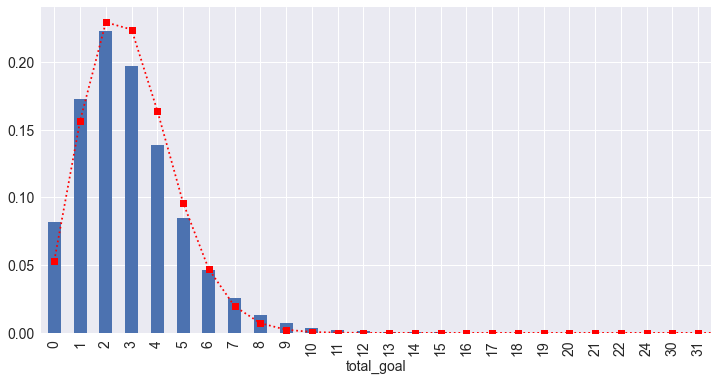

In [30]:
f1.plot(kind='bar')
plt.plot(x, f2, color='r',marker='s', linestyle=':')
plt.show()

It looks like a quite good fit.

In [31]:
corr = f1.corr(pd.Series(f2))
corr

0.9906043461203723